Objective(s):

This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

Intended Learning Outcomes (ILOs):

- Demonstrate how to solve regression problems using simple linear regression
- Use the linear regression model to predict the target value

Marquez, Keith Leigh Zhen R.

# Data Wrangling

In [ ]:
import numpy as np
import pandas as pd

life_expe = pd.read_csv('/content/Life Expectancy Data.csv')
life_expe

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
life_expe.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# Check for missing values

In [ ]:
life_expe_null = life_expe.isnull().sum()
life_expe_null

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Remove duplicates

In [ ]:
# Check for duplicates
duplicate_rows = life_expe.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# Summary statistics of numerical variables

In [ ]:
life_expe.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Remove extra whitespaces from column names

In [ ]:
life_expe.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
life_expe.columns = life_expe.columns.str.strip()
life_expe.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

# Categorical Variables

In [ ]:
print("Unique countries:", life_expe['Country'].nunique())
print("Unique status:", life_expe['Status'].unique())

Unique countries: 193
Unique status: ['Developing' 'Developed']


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

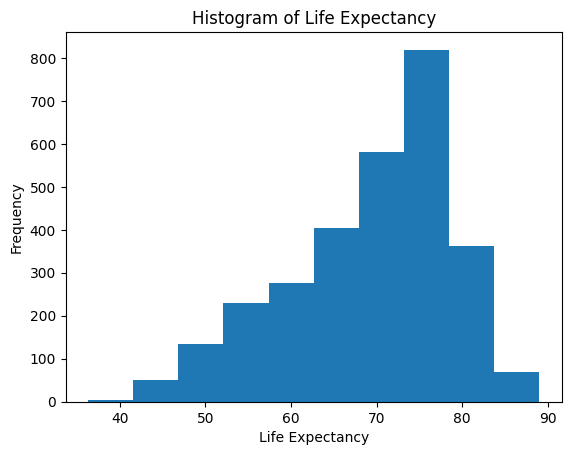

In [ ]:
plt.hist(life_expe['Life expectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.show()

The most common life expectancy falls between 70 and 80 years, with over 700 occurrences. Fewer people live significantly shorter or longer than this range. Overall, reaching the 70s is quite common, while living into the late 80s or beyond is less usual.

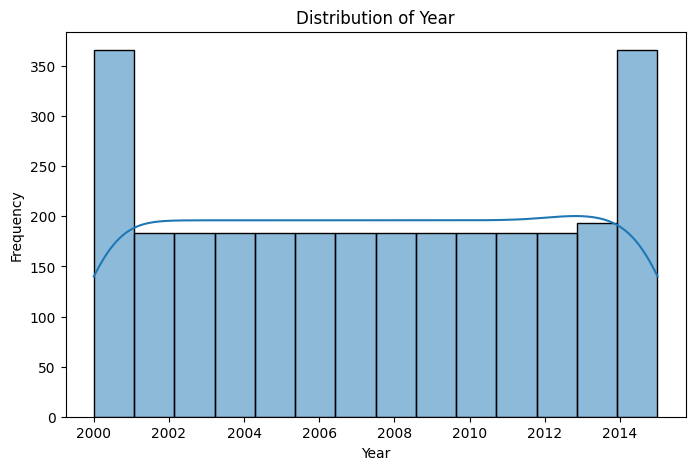

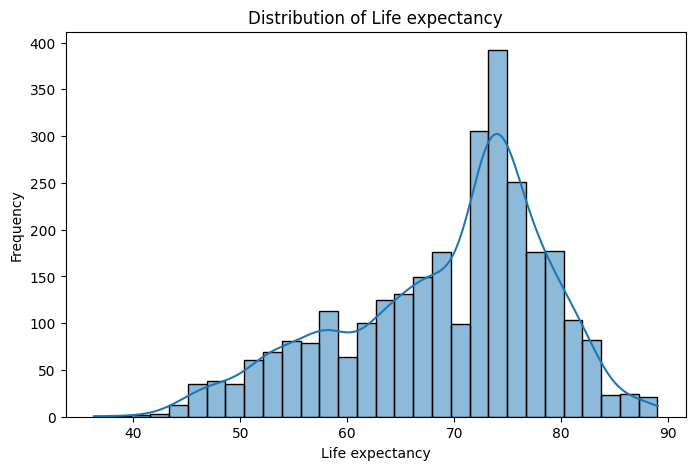

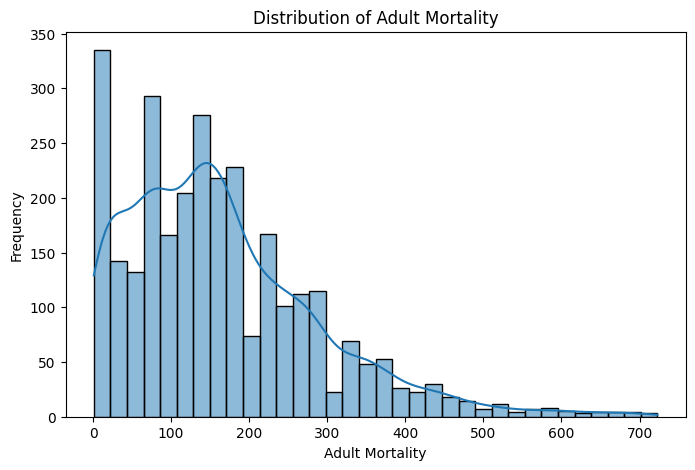

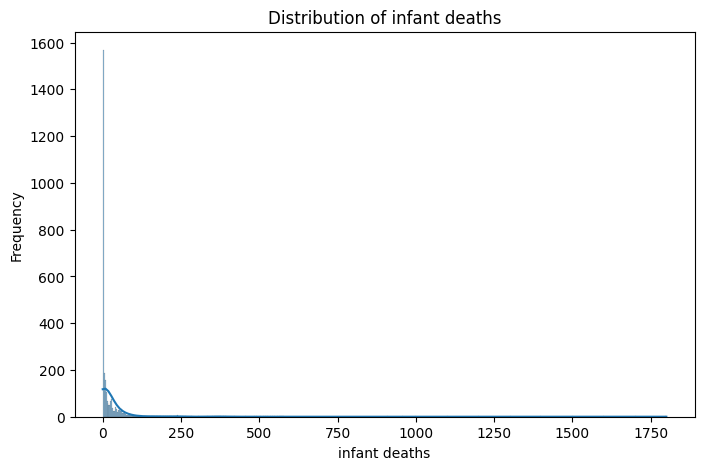

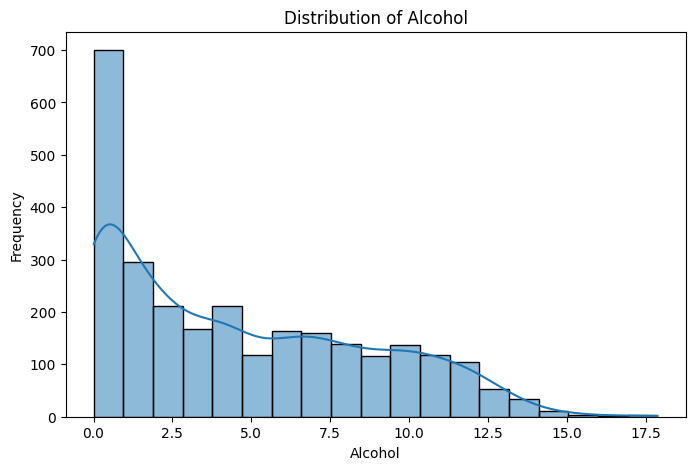

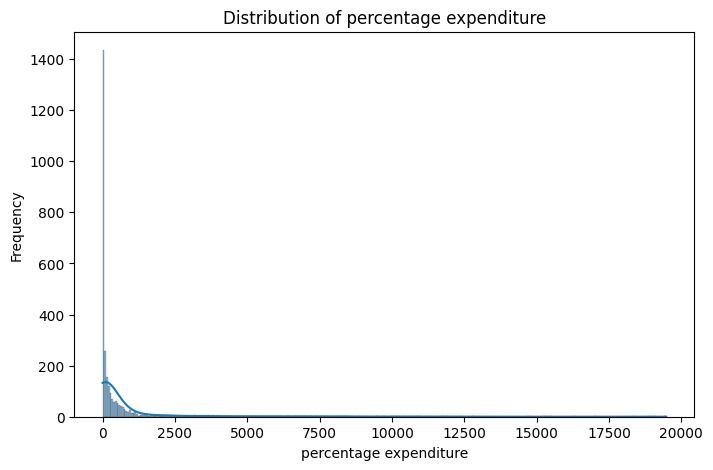

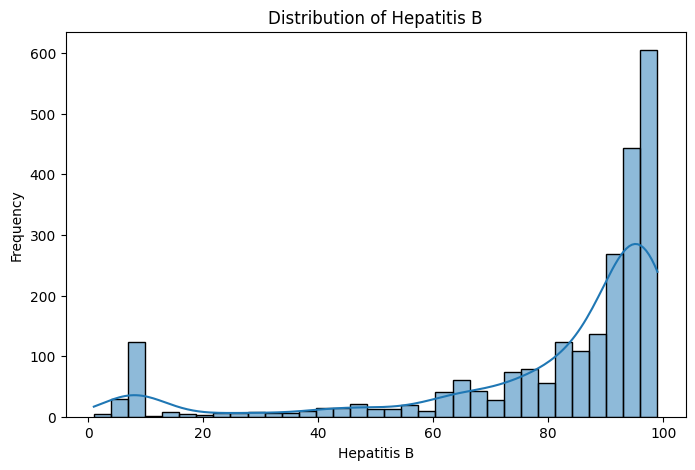

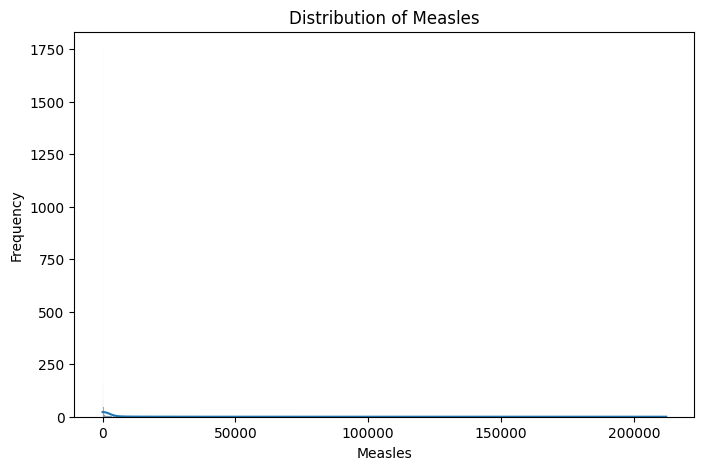

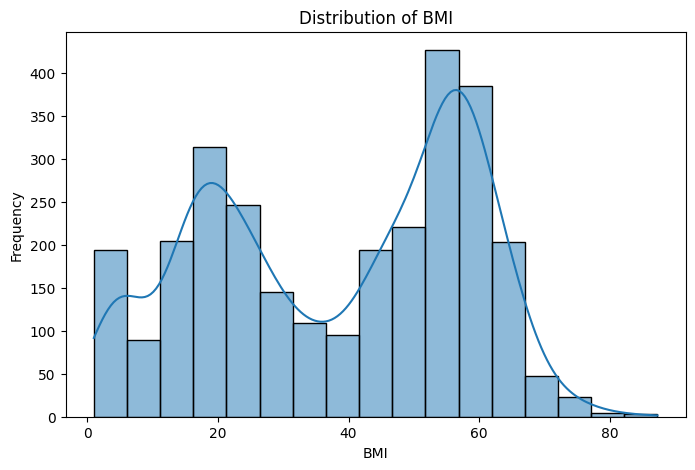

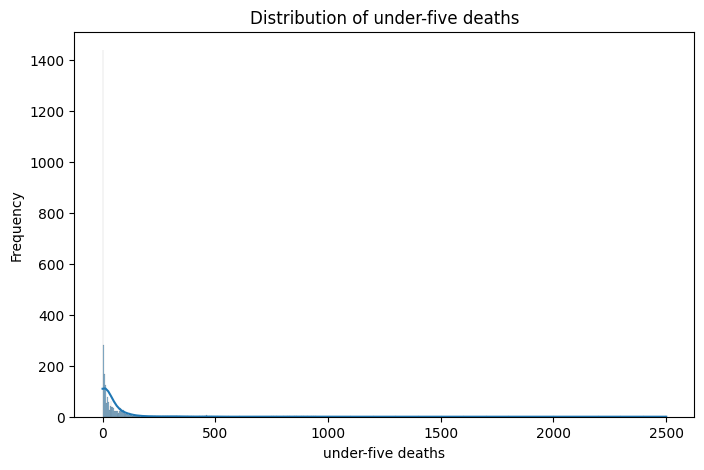

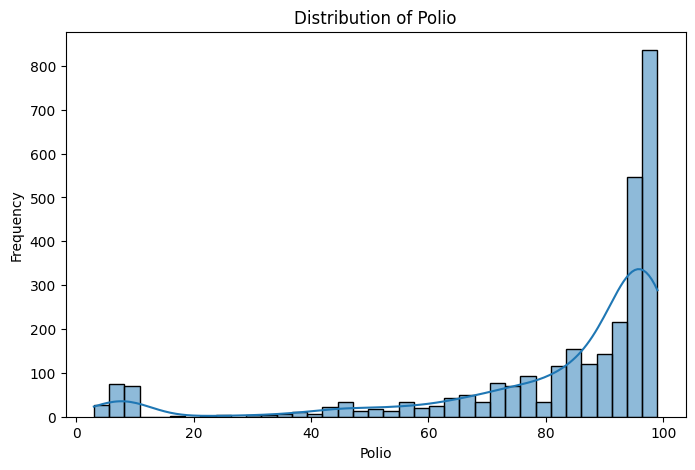

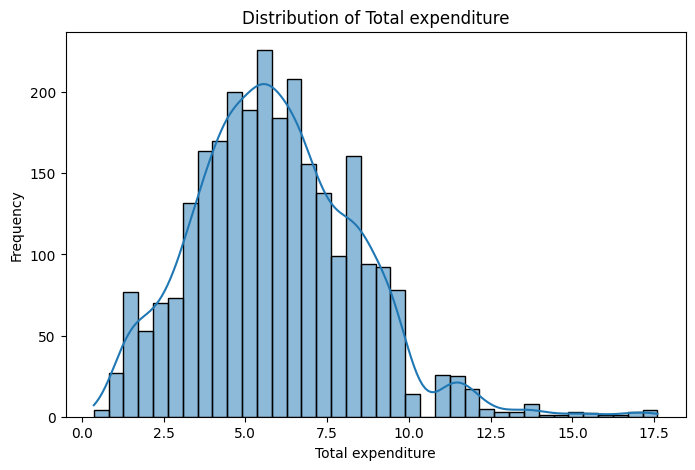

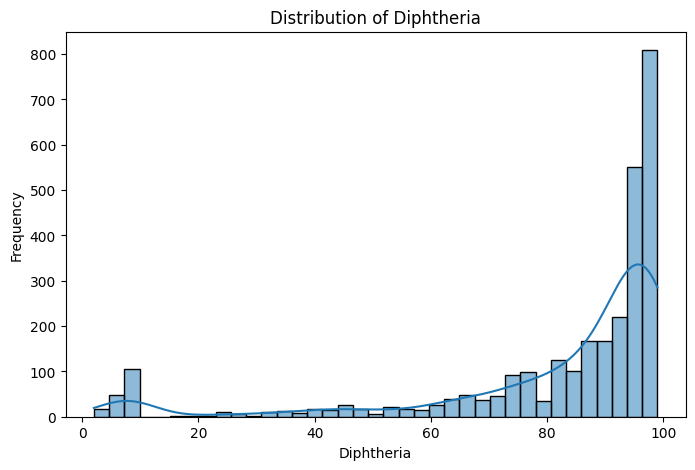

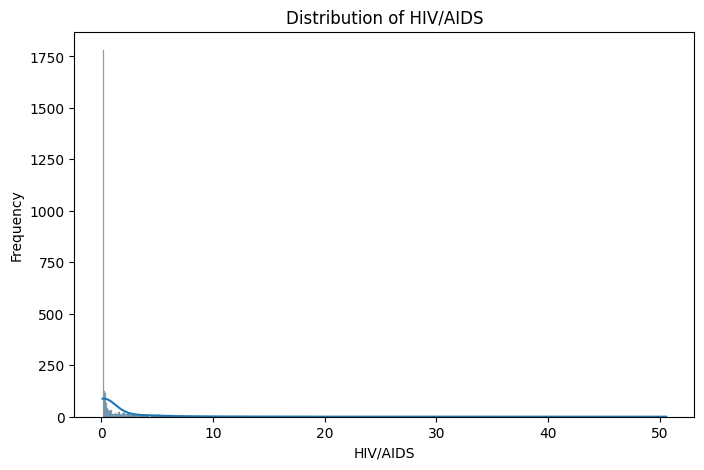

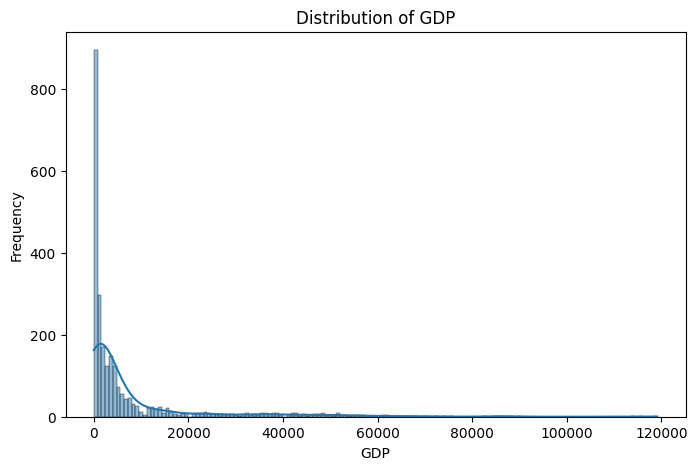

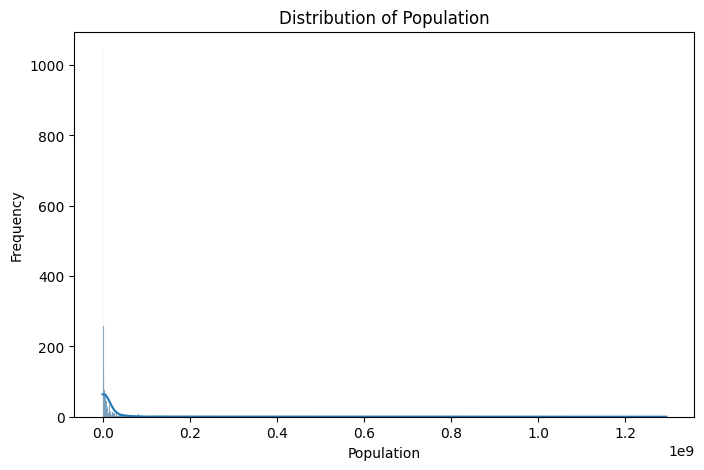

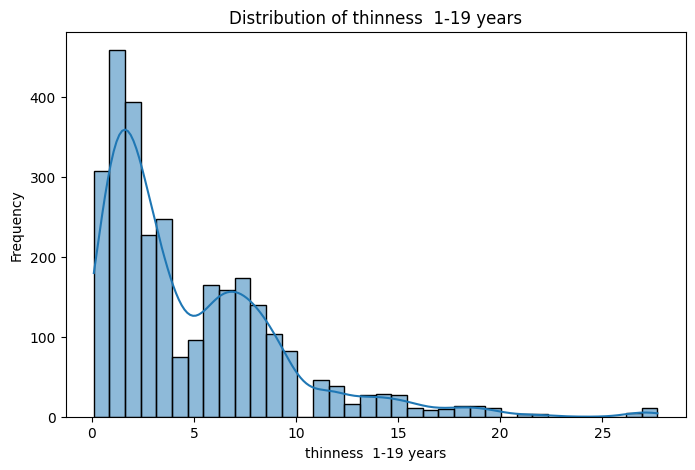

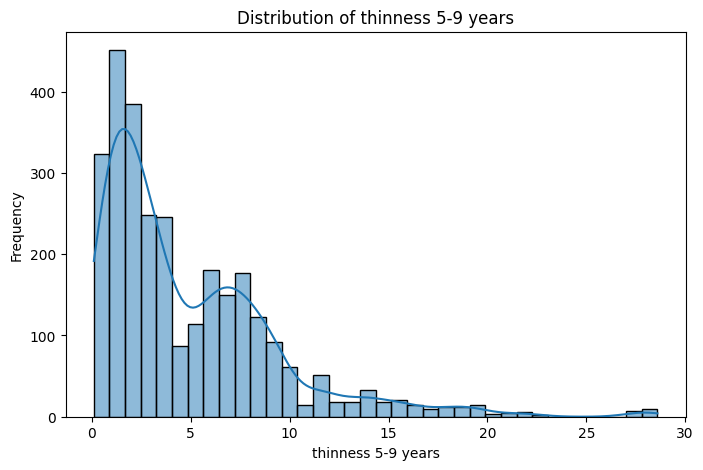

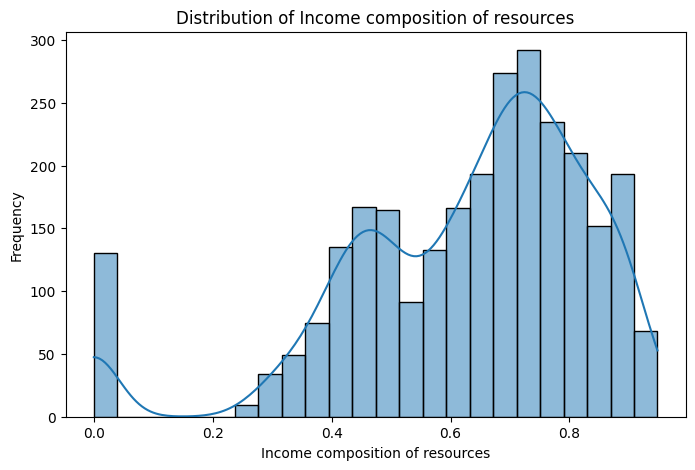

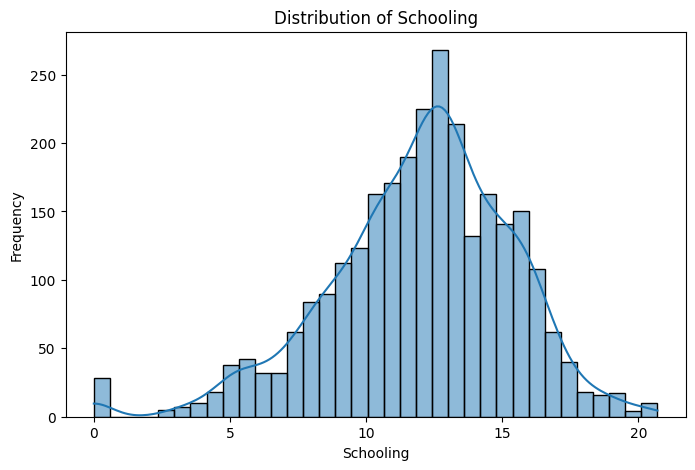

In [ ]:
num_vars = life_expe.select_dtypes(include=['float64', 'int64']).columns
for var in num_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=life_expe, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Data Exploration by Country and Status

In [ ]:
country_summary = life_expe.groupby('Country').agg({'Life expectancy': 'mean', 'GDP': 'mean', 'Population': 'sum'}).reset_index()
country_summary

,Country,Life expectancy,GDP,Population
0,Afghanistan,58.19375,340.015425,159556157.0
1,Albania,75.15625,2119.726679,11150586.0
2,Algeria,73.61875,2847.853392,346397239.0
3,Angola,49.01875,1975.143045,162353587.0
4,Antigua and Barbuda,75.05625,9759.305728,0.0
...,...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,NaN,0.0
189,Viet Nam,74.77500,NaN,0.0
190,Yemen,63.86250,NaN,0.0
191,Zambia,53.90625,811.811841,100163943.0


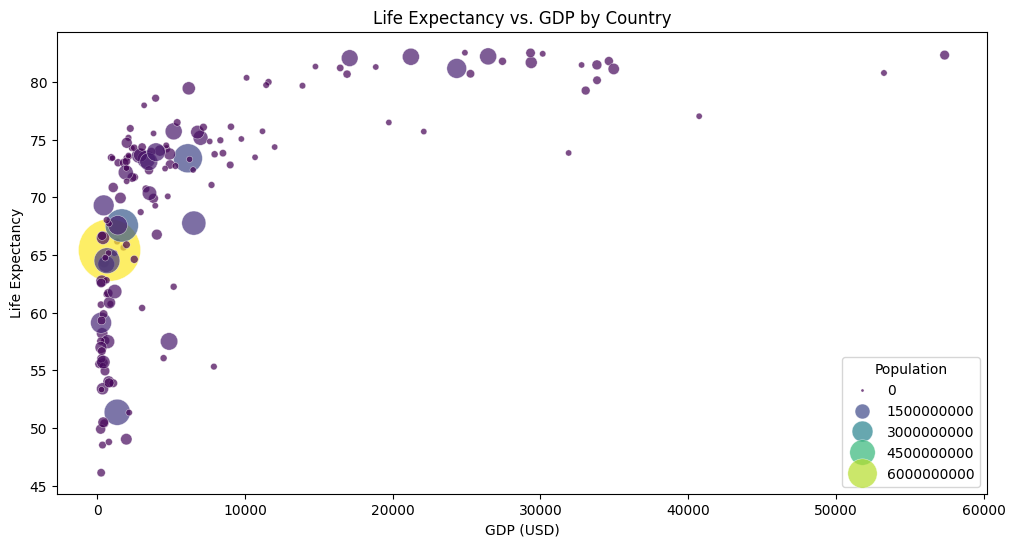

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=country_summary, x='GDP', y='Life expectancy', size='Population', hue='Population', sizes=(20, 2000), palette='viridis', alpha=0.7)
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. GDP by Country')
plt.legend(title='Population', loc='lower right', markerscale=0.5)
plt.show()

Life Expectancy vs. GDP by Country graph reveals a positive correlation between a country’s GDP and the life expectancy of its citizens. As GDP increases, so does life expectancy. However, the effect diminishes with higher GDP levels. Countries with lower GDPs exhibit more variability in life expectancy. Overall, economic prosperity is associated with longer lifespans, but other factors also play a role in health outcomes

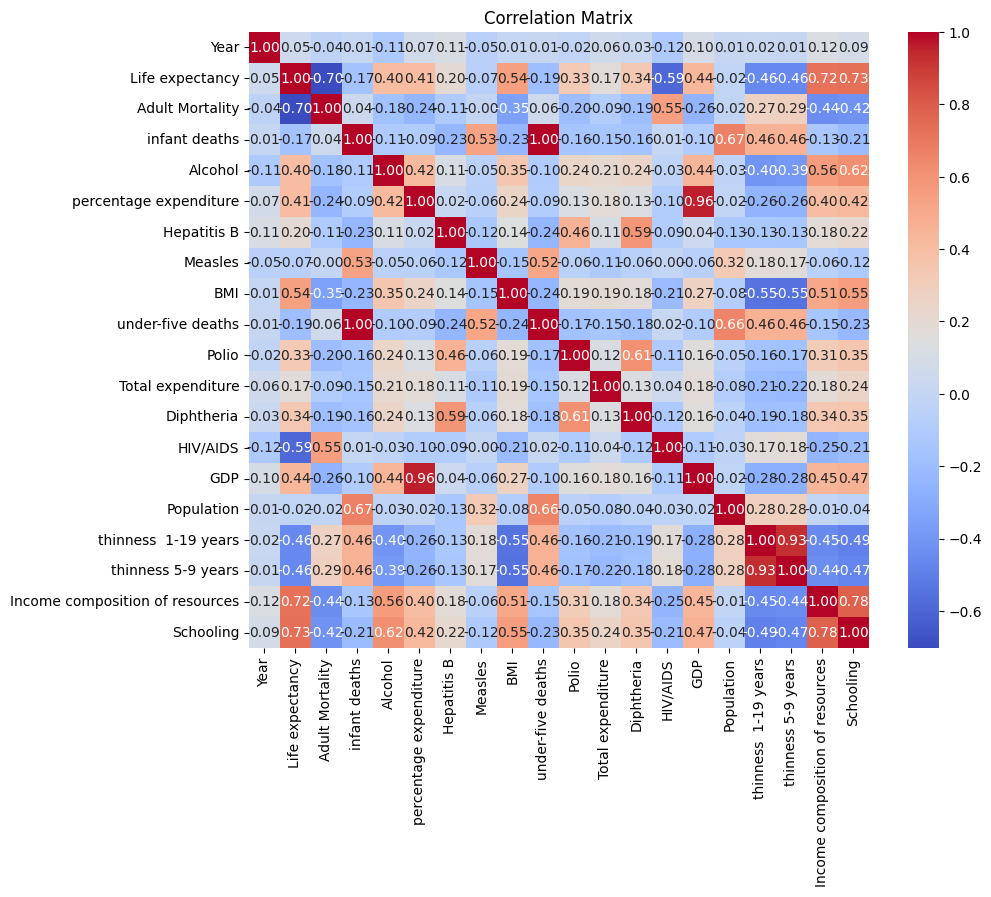

In [ ]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_cols = life_expe.select_dtypes(include=np.number).columns
numeric_data = life_expe[numeric_cols]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Scatter Plot (GDP vs. Life Expectancy):
Positive correlation between GDP and life expectancy.
Diminishing returns as GDP increases.
Outliers at lower GDP levels suggest other factors impact life expectancy.
Histogram (Life Expectancy Distribution):
Most common life expectancy: 70–80 years.
Fewer people live significantly shorter or longer.
General trend: 70s are common, late 80s or beyond less usual.
Correlation Matrix:
Positive correlations: Life expectancy with schooling, income composition, and GDP.
Negative correlations: Adult mortality and HIV/AIDS prevalence with life expectancy.
These visualizations provide insights into the relationships between economic factors, health indicators, and life expectancy.

# Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
# Drop rows with missing values for simplicity (you may choose to handle missing values differently)
life_expe.dropna(inplace=True)

In [ ]:
# Select the feature and target variables
X = life_expe[['GDP']]  # Feature variable
y = life_expe['Life expectancy']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 57.83684424806063


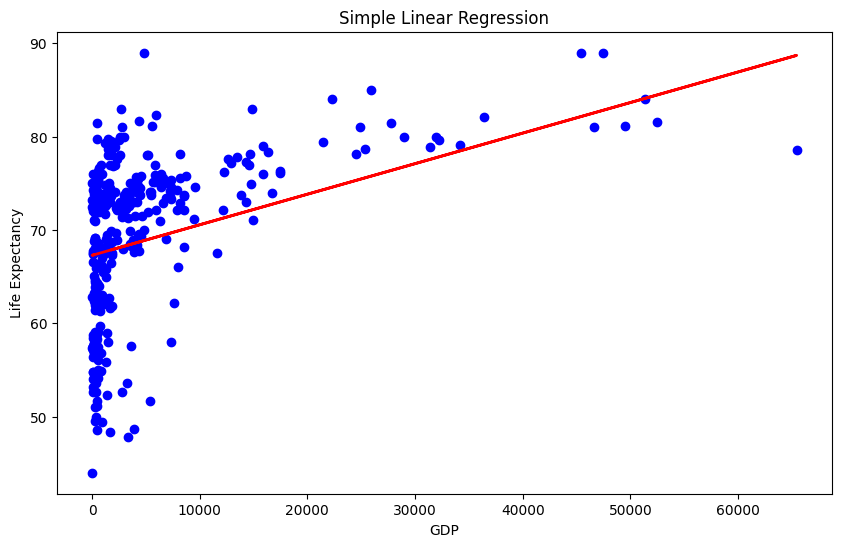

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Simple Linear Regression')
plt.show()

This shows the relationship between GDP (Gross Domestic Product) and life expectancy. As GDP increases, life expectancy tends to increase as well. However, there are many outliers, especially at lower GDP levels, indicating that other factors significantly impact life expectancy. Overall, this graph highlights the positive correlation between economic prosperity (GDP) and longer lifespans. This linear regression model helps to understand the general trend that higher economic output (GDP) is associated with longer life expectancy.